In [1]:
import pandas as pd
import numpy as np
import ast
import json
import os
from df_utils_prolific import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


cur_dir =  os.getcwd()
sns.set(font_scale=2, style = 'white', palette = 'Set3')

In [2]:
# get data csv
cur_dir =  os.getcwd()
parent_dir = os.path.dirname(os.path.dirname(cur_dir))
#data_file = 'data/prolific/data_FurnitureCompany_2022-06-13_14-10.csv'
data_file ='data/prolific/data_FurnitureCompany_2022-07-07_11-02.csv'
data_path = os.path.join(parent_dir, data_file)

df, df_model, df_ge, df_vp_sol, df_likert,  df_actions, df_built, df_resources, df_play_times = decompose_csv(data_path)
df_vp_sol[df_vp_sol.vp==244]

read cache


,vp,profit,optimum,difference,trial,month,complete
480,244,14.0,61.0,-77.049180,1,9,incomplete
481,244,41.0,48.0,-14.583333,2,6,incomplete
482,244,43.0,54.0,-20.370370,3,10,incomplete
483,244,39.0,51.0,-23.529412,4,2,complete
484,244,37.0,60.0,-38.333333,5,4,incomplete
485,244,42.0,56.0,-25.000000,6,12,incomplete


## Exclusion criteria
* if no complete trial is submitted
* if the out of tab time is higher than a certain threshold

From pilot data we should drop 93 (tab out)

In [3]:
# excluded vp:
excl = [96,118,123,136,143,93,152,154,157,158,159,160,161,174,175,179,182,183,195,200,201,203, 212,213,219,225]

In [4]:
# drop vps who did not submit any complete solution
df_complt =get_complete_sol(df_resources).sum(axis = 1) # check
for i in df_complt[df_complt == 0].index:
    print('df = df.drop(' + str(i)+ ')')
    # df = df.drop(int(i))
    ex = df_vp_sol[df_vp_sol.vp == int(i)].index
    df_vp_sol = df_vp_sol.drop(ex)
    ax = df_actions[df_actions.vp == int(i)].index
    df_actions = df_actions.drop(ax)
df_actions = df_actions.reset_index()


In [5]:
# what should the threshold be? 
for vp in df_actions[df_actions.action == 'XX'].vp.unique():
    for trial in df_actions[(df_actions.action == 'XX') &( df_actions.vp == vp)].trial.unique():
        idxs = df_actions[(df_actions.action == 'XX') &( df_actions.vp == vp)&( df_actions.trial == trial)].index
        t_out = sum([df_actions.iloc[idx].timepoint - df_actions.iloc[idx-1].timepoint for idx in idxs])
        print('Vp '+ str(vp) + ', trial ' + str(trial) + ': ' + str(round(t_out,3)) + ' seconds')
   
     

Vp 122, trial 2: 12.1 seconds
Vp 124, trial 4: 8.3 seconds
Vp 127, trial 0: 39.2 seconds
Vp 142, trial 1: 5.5 seconds
Vp 142, trial 5: 109.8 seconds
Vp 149, trial 3: 45.9 seconds
Vp 167, trial 5: 27.5 seconds
Vp 171, trial 2: 3.5 seconds
Vp 172, trial 0: 20.1 seconds
Vp 172, trial 1: 7.3 seconds
Vp 172, trial 2: 37.8 seconds
Vp 172, trial 3: 6.8 seconds
Vp 172, trial 5: 35.7 seconds
Vp 189, trial 5: 69.1 seconds
Vp 206, trial 3: 23.8 seconds
Vp 208, trial 0: 14.1 seconds
Vp 224, trial 1: 4.6 seconds
Vp 224, trial 5: 15.5 seconds
Vp 229, trial 3: 18.2 seconds
Vp 234, trial 1: 11.5 seconds
Vp 235, trial 2: 1.4 seconds
Vp 237, trial 4: 7.1 seconds
Vp 237, trial 5: 7.7 seconds
Vp 244, trial 4: 9.1 seconds
Vp 244, trial 5: 70.4 seconds
Vp 247, trial 1: 7.3 seconds
Vp 247, trial 3: 10.3 seconds
Vp 247, trial 5: 27.7 seconds


(-1.0, 7.0)

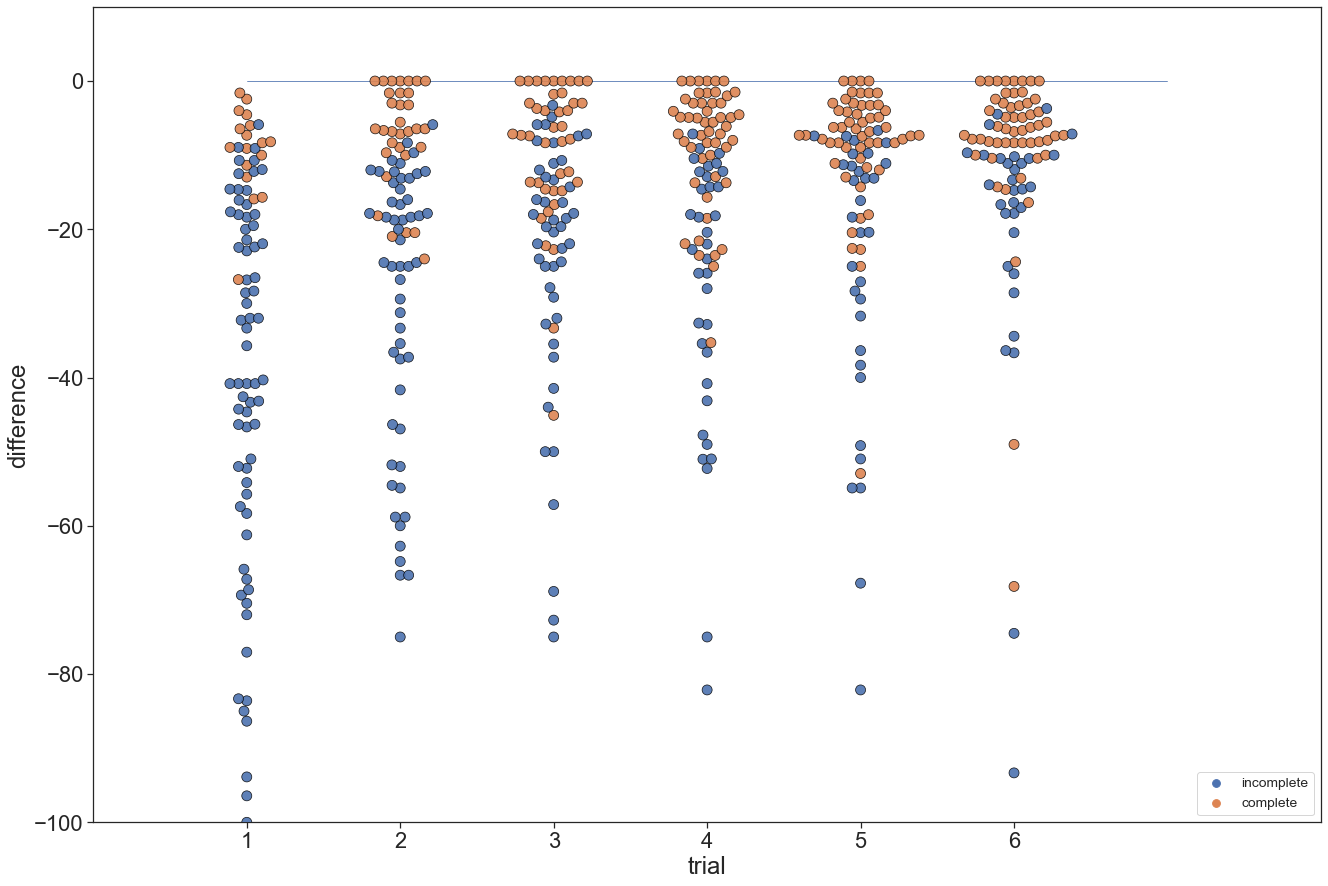

In [13]:
fig = plt.figure(figsize=(22, 15))
sns.lineplot(x=list(range(7)),y=np.zeros(7), linewidth = 0.8)

g = sns.swarmplot(data = df_vp_sol, x = 'trial', y = 'difference', 
                  linewidth = 0.7, edgecolor="black", size = 10, hue = 'complete', alpha = 0.9)
plt.legend(loc = 'lower right',  fontsize = 'xx-small')
plt.ylim((-100,10))
plt.xlim((-1,7))

/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(-1.0, 13.0)

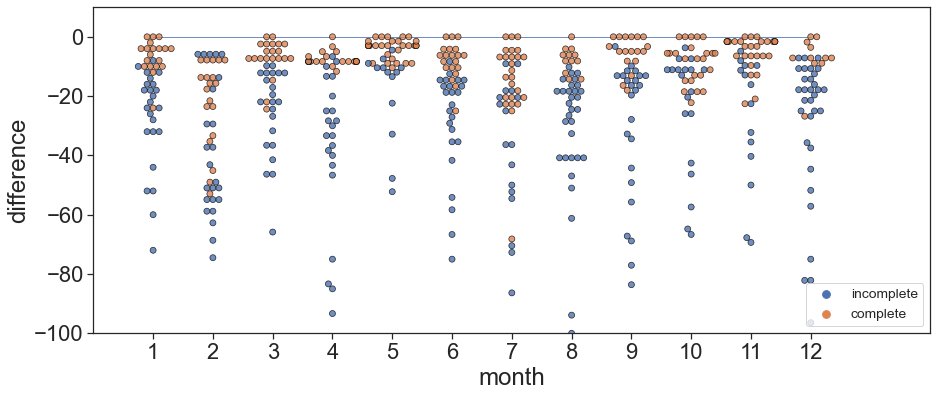

In [18]:
fig = plt.figure(figsize=(15, 6))
sns.lineplot(x=list(range(12)),y=np.zeros(12), linewidth = 0.8)

g = sns.swarmplot(data = df_vp_sol, x = 'month', y = 'difference', hue = 'complete',
                  linewidth = 0.7, edgecolor="black", size = 6,  alpha = 0.8)
plt.legend(loc = 'lower right',  fontsize = 'xx-small')
plt.ylim((-100,10))
plt.xlim((-1,13))

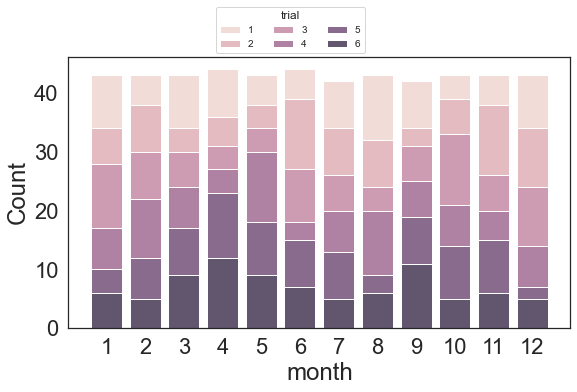

In [8]:
fig, ax = plt.subplots(figsize=(9, 5)) 

g =sns.histplot(x='month', hue = 'trial', data=df_vp_sol[['trial', 'month']], bins =12, multiple="stack",discrete = True, shrink = 0.8)
ax.set_xticks(range(1,13,1))
lab = ax.set_xticklabels([str(i) for i in range(1,13)])
old_legend = ax.legend_
handles = old_legend.legendHandles
labels = [t.get_text() for t in old_legend.get_texts()]
title = old_legend.get_title().get_text()
ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(.6, 1.2), ncol=3, title = 'trial', title_fontsize=12, fontsize =10 )
    #ax.legend(loc = 'upper right', fontsize = 10)


In [9]:
list(df_vp_sol.groupby([ 'month']).count().vp.values)

[43, 43, 43, 44, 43, 44, 42, 43, 42, 43, 43, 43]

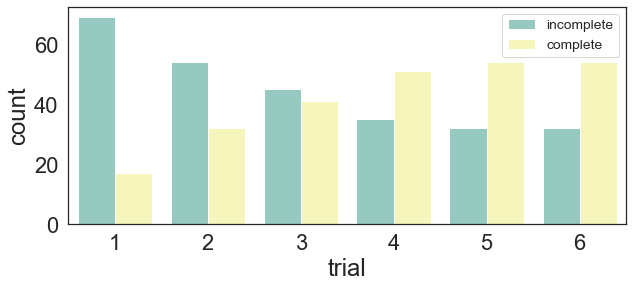

In [10]:
fig = plt.figure(figsize=(10, 4))

sns.countplot(data = df_vp_sol, x = 'trial', hue = 'complete')
plt.legend(loc = 'upper right',  fontsize = 'xx-small')


In [11]:
df_ge = df_ge.sort_values(by=['GE13'])
age_dict = {1:'< 18', 2: '18-24', 3: '25-29', 4:'30-39',5:'40-49', 6:'50-59', 7: '> 60'} # GE01
gender = {-1: 'na', 1:' male', 2: 'female', 3: 'diverse'} # GE03
experience = {1:'no games in \n my free time', 2: 'irregular\n intervals', 3: '2-3x \n in month', 4:'at least 1x \n week (regularly)'}
df_demographics = pd.DataFrame()
df_demographics['Age'] = df_ge.GE13.map(age_dict)
df_demographics['Gender'] = df_ge.GE15.map(gender)
df_demographics['Experience'] = df_ge.GE16.map(experience)


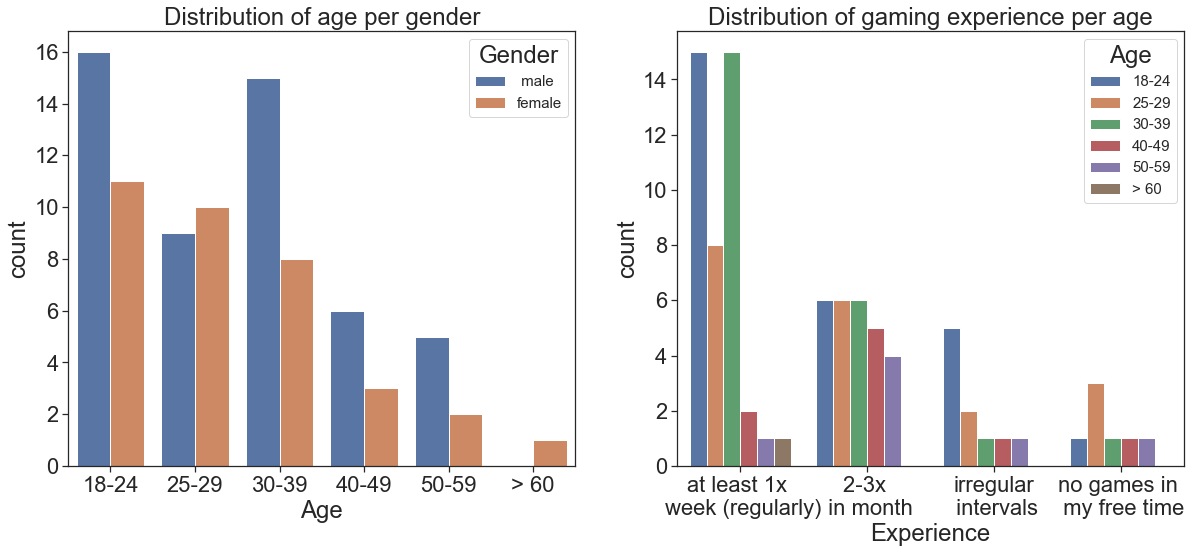

In [12]:

sns.set(font_scale=2, style = 'ticks', palette = 'deep') 
fig = plt.figure(figsize=(20, 8))


sub = fig.add_subplot(1,2,1)
sub.set_title('Distribution of age per gender')
sns.countplot(data = df_demographics, x = 'Age', hue = 'Gender', ax = sub)
sub.legend(title = 'Gender',loc = 'upper right', fontsize = 15)

sub1 = fig.add_subplot(1,2,2)
sub1.set_title('Distribution of gaming experience per age')
sns.countplot(data = df_demographics, x = 'Experience',hue = 'Age', ax = sub1)
sub1.legend(title = 'Age',loc = 'upper right', fontsize = 15)
#fig.savefig('Images/demographics.png',bbox_inches='tight')
